In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("mnist_train.csv")

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
label=df['label']

In [6]:
label.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [7]:
df=df.drop('label',axis=1)

In [8]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
index=100

In [10]:
import matplotlib.pyplot as plt

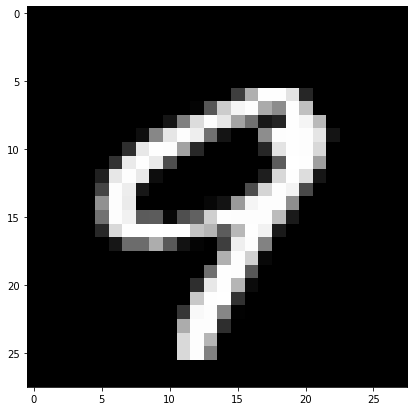

9


In [11]:
plt.figure(figsize=(7,7))
grid_data=df.iloc[index].values.reshape(28,28)
plt.imshow(grid_data,cmap='gray',interpolation=None)
plt.show()
print(label[index])

In [12]:
labels=label.head(15000)
data=df.head(15000)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
Standardized_scaler=StandardScaler().fit_transform(data)

In [15]:
sample_data=Standardized_scaler

In [16]:
covar_matrix=np.matmul(sample_data.T,sample_data)

In [17]:
from scipy.linalg import eigh

In [18]:
value,vector=eigh(covar_matrix,eigvals=(782,783))

In [19]:
value

array([435532.55785282, 605719.29173629])

In [20]:
vector

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [21]:
sample_data.shape

(15000, 784)

In [22]:
vector.shape
vector=vector.T

In [23]:
new_coordinate=np.matmul(vector,sample_data.T)

In [24]:
new_coordinate.shape

(2, 15000)

In [25]:
labels.shape

(15000,)

In [26]:
new_coordinate=np.vstack((new_coordinate,labels)).T

In [27]:
dataframe=pd.DataFrame(data=new_coordinate,columns=("1st_Principle","2nd_Principle","labels"))

In [28]:
dataframe.head()

,1st_Principle,2nd_Principle,labels
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


In [29]:
import seaborn as sns

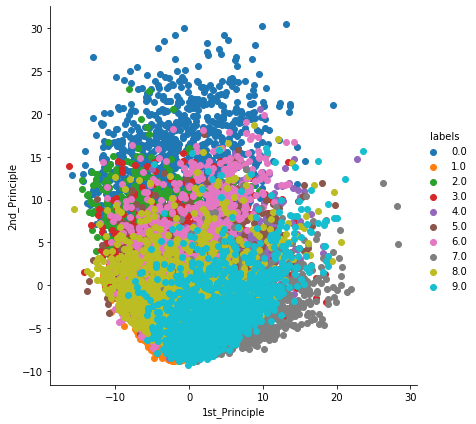

In [30]:
sns.FacetGrid(dataframe,hue="labels",height=6)\
    .map(plt.scatter,"1st_Principle","2nd_Principle")\
    .add_legend()
plt.show()

In [31]:
from sklearn import decomposition

In [32]:
pca=decomposition.PCA()

In [33]:
pca.n_components=2

In [34]:
pca_data=pca.fit_transform(sample_data)

In [35]:
pca_data.shape

(15000, 2)

In [36]:
pca_data=np.vstack((pca_data.T,labels)).T

In [37]:
pca_df=pd.DataFrame(pca_data,columns=("1stPr","2ndPr","labels"))

In [38]:
pca_df.head()

,1stPr,2ndPr,labels
0,-5.043580,-5.558782,1.0
1,19.305285,6.193332,0.0
2,-7.678734,-1.909725,1.0
3,-0.464781,5.525586,4.0
4,26.644347,6.366242,0.0


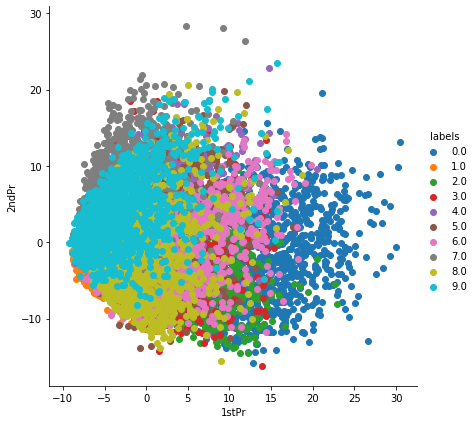

In [39]:
sns.FacetGrid(data=pca_df,hue="labels",height=6)\
    .map(plt.scatter,"1stPr","2ndPr")\
    .add_legend()
plt.show()

In [40]:
pca.n_components=784

In [41]:
pca_data=pca.fit_transform(sample_data)

In [42]:
percentage_var_explained=pca.explained_variance_/np.sum(pca.explained_variance_)

In [43]:
cum_var_explained=np.cumsum(percentage_var_explained)

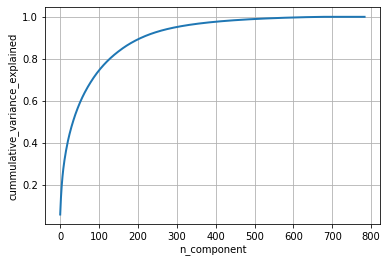

In [44]:
plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(cum_var_explained,linewidth=2.0)
plt.axis('tight')
plt.grid()
plt.xlabel('n_component')
plt.ylabel('cummulative_variance_explained')
plt.show()

In [45]:
from sklearn.manifold import TSNE

In [47]:
data_1000=Standardized_scaler[0:1000,:]
labels_1000=labels[0:1000]

In [48]:
model=TSNE(n_components=2,random_state=0)

In [49]:
tsne_data=model.fit_transform(data_1000)

In [50]:
tsne_data.shape

(1000, 2)

In [51]:
labels_1000.shape

(1000,)

In [52]:
tsne_data=np.vstack((tsne_data.T,labels_1000)).T

In [53]:
tsne_df=pd.DataFrame(data=tsne_data,columns=('Dim-1','Dim-2','labels'))

In [54]:
tsne_df.head()

,Dim-1,Dim-2,labels
0,-6.942395,-9.005229,1.0
1,42.456215,-11.925229,0.0
2,-9.462640,11.180339,1.0
3,-23.132465,4.786835,4.0
4,45.695461,-16.354523,0.0


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

<Figure size 1800x720 with 0 Axes>

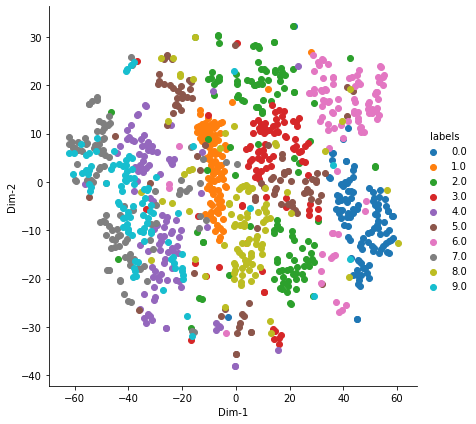

In [55]:
plt.figure(figsize=(25,10))
sns.FacetGrid(tsne_df,hue="labels",height=6)\
    .map(plt.scatter,"Dim-1","Dim-2")\
    .add_legend()
plt.plot